In [1]:
# Importing Required Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Data file.csv")   #reading the dataset

### Exploratory Data Analysis 

In [4]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [5]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [6]:
df = df.drop('Unnamed: 0',axis=1) # Dropping the unwanted Column

In [7]:
df.shape

(209593, 36)

In [8]:
df.isnull().any()   # No Null Values

label                   False
msisdn                  False
aon                     False
daily_decr30            False
daily_decr90            False
rental30                False
rental90                False
last_rech_date_ma       False
last_rech_date_da       False
last_rech_amt_ma        False
cnt_ma_rech30           False
fr_ma_rech30            False
sumamnt_ma_rech30       False
medianamnt_ma_rech30    False
medianmarechprebal30    False
cnt_ma_rech90           False
fr_ma_rech90            False
sumamnt_ma_rech90       False
medianamnt_ma_rech90    False
medianmarechprebal90    False
cnt_da_rech30           False
fr_da_rech30            False
cnt_da_rech90           False
fr_da_rech90            False
cnt_loans30             False
amnt_loans30            False
maxamnt_loans30         False
medianamnt_loans30      False
cnt_loans90             False
amnt_loans90            False
maxamnt_loans90         False
medianamnt_loans90      False
payback30               False
payback90 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [10]:
# All the Categorical variables
df.columns[df.dtypes == object]   

Index(['msisdn', 'pcircle', 'pdate'], dtype='object')

### Dropping  the Unwanted Columns

In [11]:
df.pcircle.unique()  #contains only one value

array(['UPW'], dtype=object)

In [12]:
df = df.drop(['msisdn', 'pcircle', 'pdate'],axis=1)

Dropping the columns:- msisdn - mobile number of user, pdate - date, pcircle - telecom circle since these are irrelevant for the Analysis

In [58]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


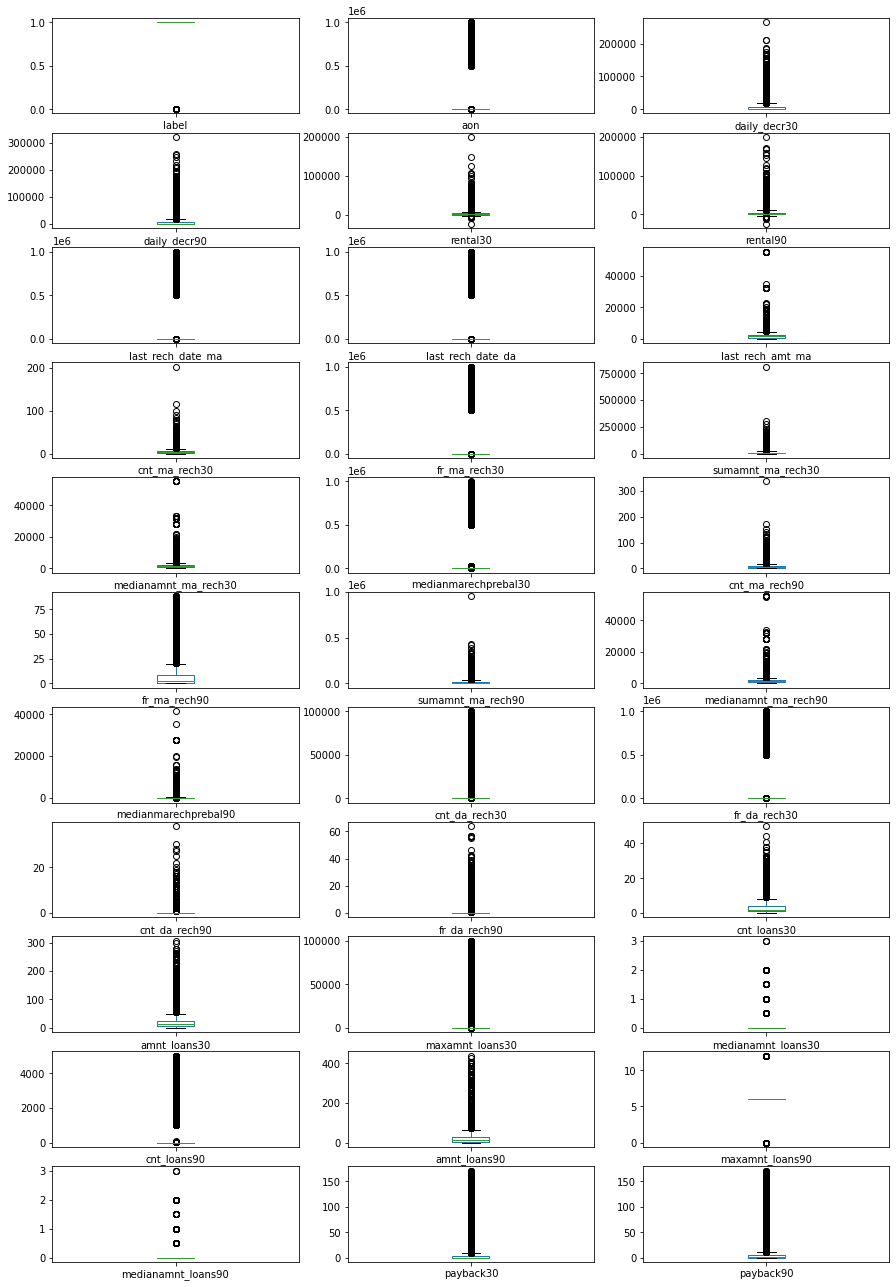

In [60]:
df.plot(kind='box',subplots=True,layout=(12,3),figsize=(15,25))
plt.show()

Lots of Outliers are in many columns. Hence we need to remove them so that the model prediction is good.

In [61]:
#CORELATION MATRIX
corr = df.corr()

In [63]:
corr

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,...,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,...,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,...,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,...,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,...,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,...,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,...,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,...,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417
last_rech_amt_ma,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,...,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,...,0.765802,0.752296,0.000109,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362


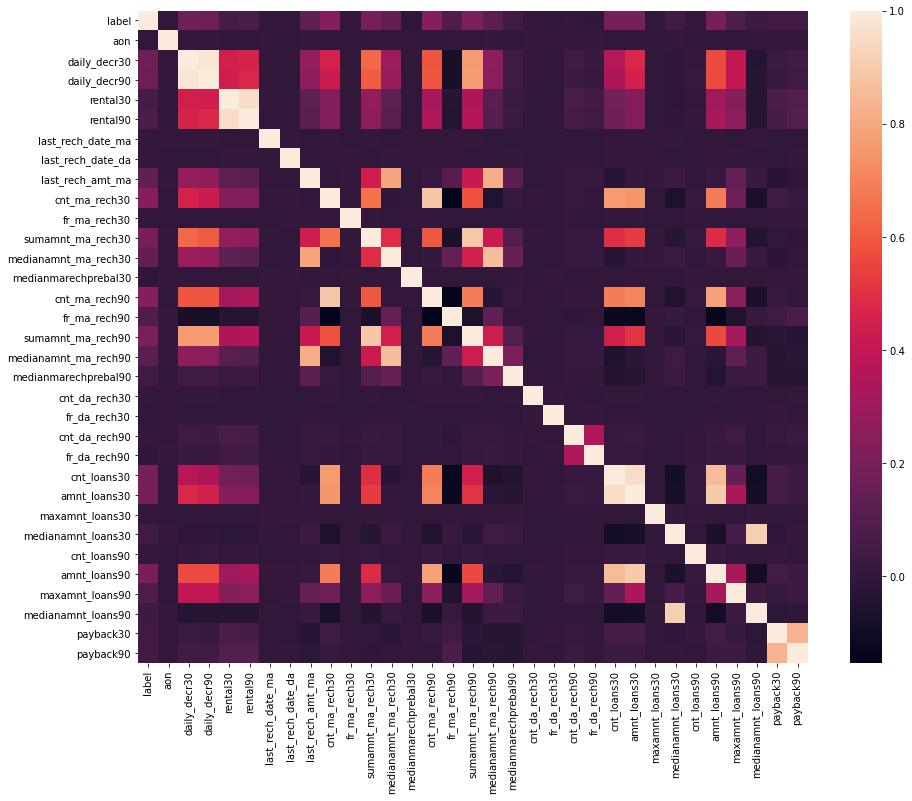

In [62]:
import seaborn as sns
plt.figure(figsize=(15,12))     
sns.heatmap(corr)

Based on the heatmap many columns are somewhat correlated to the target column, but none are strongly correlated. We will therefore keep all the data columns to help with classification at this time.

### Model- Building

Some Preprocessing is required before running the models.

In [14]:
# Removing outliers - dataset renamed to df2
from scipy import stats
from scipy.stats import zscore

z_score=abs(zscore(df))
print(df.shape)
df2=df.loc[(z_score<5.0).all(axis=1)]
print(df2.shape)

(209593, 33)
(190496, 33)


In [15]:
df2.label.value_counts()

1    166312
0     24184
Name: label, dtype: int64

This is an unbalanced dataset. We can deal with it using oversampling.

In [16]:
from sklearn.utils import shuffle
A= df2[df2['label']==0]
B= df2[df2['label']==1]
print(len(A),len(B))

24184 166312


In [17]:
len(B)/len(A)

6.876943433675157

In [18]:
A_repeated = pd.concat([A]*7, ignore_index=True)
df_ml = pd.concat([A_repeated,B])
df_ml = shuffle(df_ml)
df_ml = df_ml.reset_index(drop=True)

In [19]:
df_ml.label.value_counts()

0    169288
1    166312
Name: label, dtype: int64

Now the dataset is Balanced and outliers removed

In [20]:
y = df_ml['label'].values   # Target Variable

In [21]:
df_ml = df_ml.drop('label', axis = 1)

In [22]:
X = df_ml.values   #  Independent Variables

In [23]:
#Importing Scaler
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
# Splitting into training and Test dataset
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=48)

In [25]:
# Importing Classification Models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

### Model 1 -- Logistic Regression 

In [29]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
predictions1 = logreg.predict(X_test)

In [30]:
print("accuracy_score: ",accuracy_score(y_test,predictions1))
print(confusion_matrix(y_test,predictions1))

accuracy_score:  0.7696513706793802
[[27439  6276]
 [ 9185 24220]]


### Model2 -- Decision Tree Classifier 

In [34]:
dectree = DecisionTreeClassifier()
dectree.fit(X_train,y_train)
predictions2 = dectree.predict(X_test)

In [39]:
print("accuracy_score: ",accuracy_score(y_test,predictions2))
print(confusion_matrix(y_test,predictions2))

accuracy_score:  0.9577622169249106
[[33715     0]
 [ 2835 30570]]


### Model3 -- Gaussian Naive Bayes

In [37]:
naivebayes = GaussianNB()
naivebayes.fit(X_train,y_train)
predictions3 = naivebayes.predict(X_test)

In [40]:
print("accuracy_score: ",accuracy_score(y_test,predictions3))
print(confusion_matrix(y_test,predictions3))

accuracy_score:  0.7068682955899881
[[29039  4676]
 [14999 18406]]


### Model4 -- Random Forest Classifier

In [41]:
randfor = RandomForestClassifier()
randfor.fit(X_train,y_train)
predictions4 = randfor.predict(X_test)

In [42]:
print("accuracy_score: ",accuracy_score(y_test,predictions4))
print(confusion_matrix(y_test,predictions4))

accuracy_score:  0.9790673420738975
[[33715     0]
 [ 1405 32000]]


In [45]:
prediction_list = [predictions1, predictions2, predictions3, predictions4]

In [53]:
# Function for printing classification report of various models
def print_classification_report(prediction_list):
    N = 1
    for predictions in prediction_list:
        print("MODEL_" + str(N))
        print(classification_report(y_test,predictions),'\n\n')
        N+=1

#### Printing Performance of all the models for Comparation 

In [54]:
print_classification_report(prediction_list)

MODEL_1
              precision    recall  f1-score   support

           0       0.75      0.81      0.78     33715
           1       0.79      0.73      0.76     33405

    accuracy                           0.77     67120
   macro avg       0.77      0.77      0.77     67120
weighted avg       0.77      0.77      0.77     67120
 


MODEL_2
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     33715
           1       1.00      0.92      0.96     33405

    accuracy                           0.96     67120
   macro avg       0.96      0.96      0.96     67120
weighted avg       0.96      0.96      0.96     67120
 


MODEL_3
              precision    recall  f1-score   support

           0       0.66      0.86      0.75     33715
           1       0.80      0.55      0.65     33405

    accuracy                           0.71     67120
   macro avg       0.73      0.71      0.70     67120
weighted avg       0.73      0.71      0.70 

As we have observed the best performing model on the Test Data -- Unseen Data is the Random Forest model, hence it will be the final Model

In [64]:
#Saving the Best Model
import joblib
# Saving the model as a pickle in a file
joblib.dump(randfor,"micro_credit_classification.pkl")

['micro_credit_classification.pkl']

### Conclusion 

1. The data contained outliers which was dealt using Outlier removal before Prediction.
2. It was an Unbalanced Dataset which was dealt using oversampling.
3. Based on the heatmap many columns are somewhat correlated to the target column, but none are strongly correlated.
4. Decision Trees and Random Forest, which is simply a collection of decision trees performed best on the dataset. The precision is accurate with zero False Positive(FP) values but recall is little bit less with a few number of False Negative(FN) values.
5. The Best model performed 98% accuracy on the unseen Test Dataset.